In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
data1=pd.read_csv('D:/occupation/Data scince/Exercise/U.S. News and World Report’s College Data/College.csv',index_col=0)        # import dataset. 
data1

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University         18.1           12    7041         60  
Adelphi University                   12.2           16   10527         56  
Adrian College                       12.9           30    8735         54  
Agnes Scott College                   7.7           37   19016         59  
Alaska Pacific University            11.9            2   10922         15  
...                                   ...          ...     ...        ...  
Worcester State College              21.0           14    4469         40  
Xavier University                    13.3           31    9189         83  
Xavier University of Louisiana       14.4           20    8323         49  
Yale University                       5.8           49   40386         99  
York College of Pennsylvania         18.1           28    4509         99  

[777 rows x 18 columns]

In [5]:
data1.info()                 

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
data1.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [7]:
data1.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

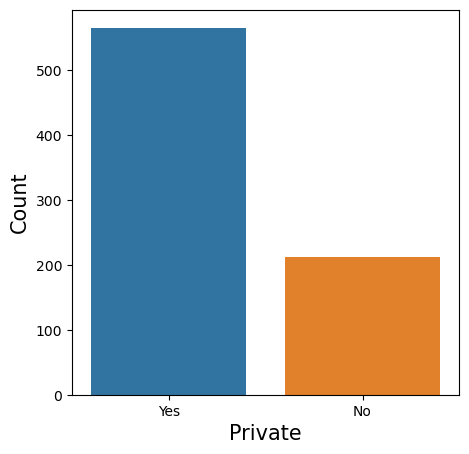

In [8]:
plt.figure(figsize = (5,5))              #Compare how many of people study in private collage?
sns.countplot(data=data1,x='Private')
plt.xlabel('Private', fontsize = 15, color = 'black')
plt.rc('xtick', labelsize=10, color = 'black')
plt.ylabel('Count', fontsize = 15, color = 'black')
plt.rc('ytick', labelsize=10, color = 'black')

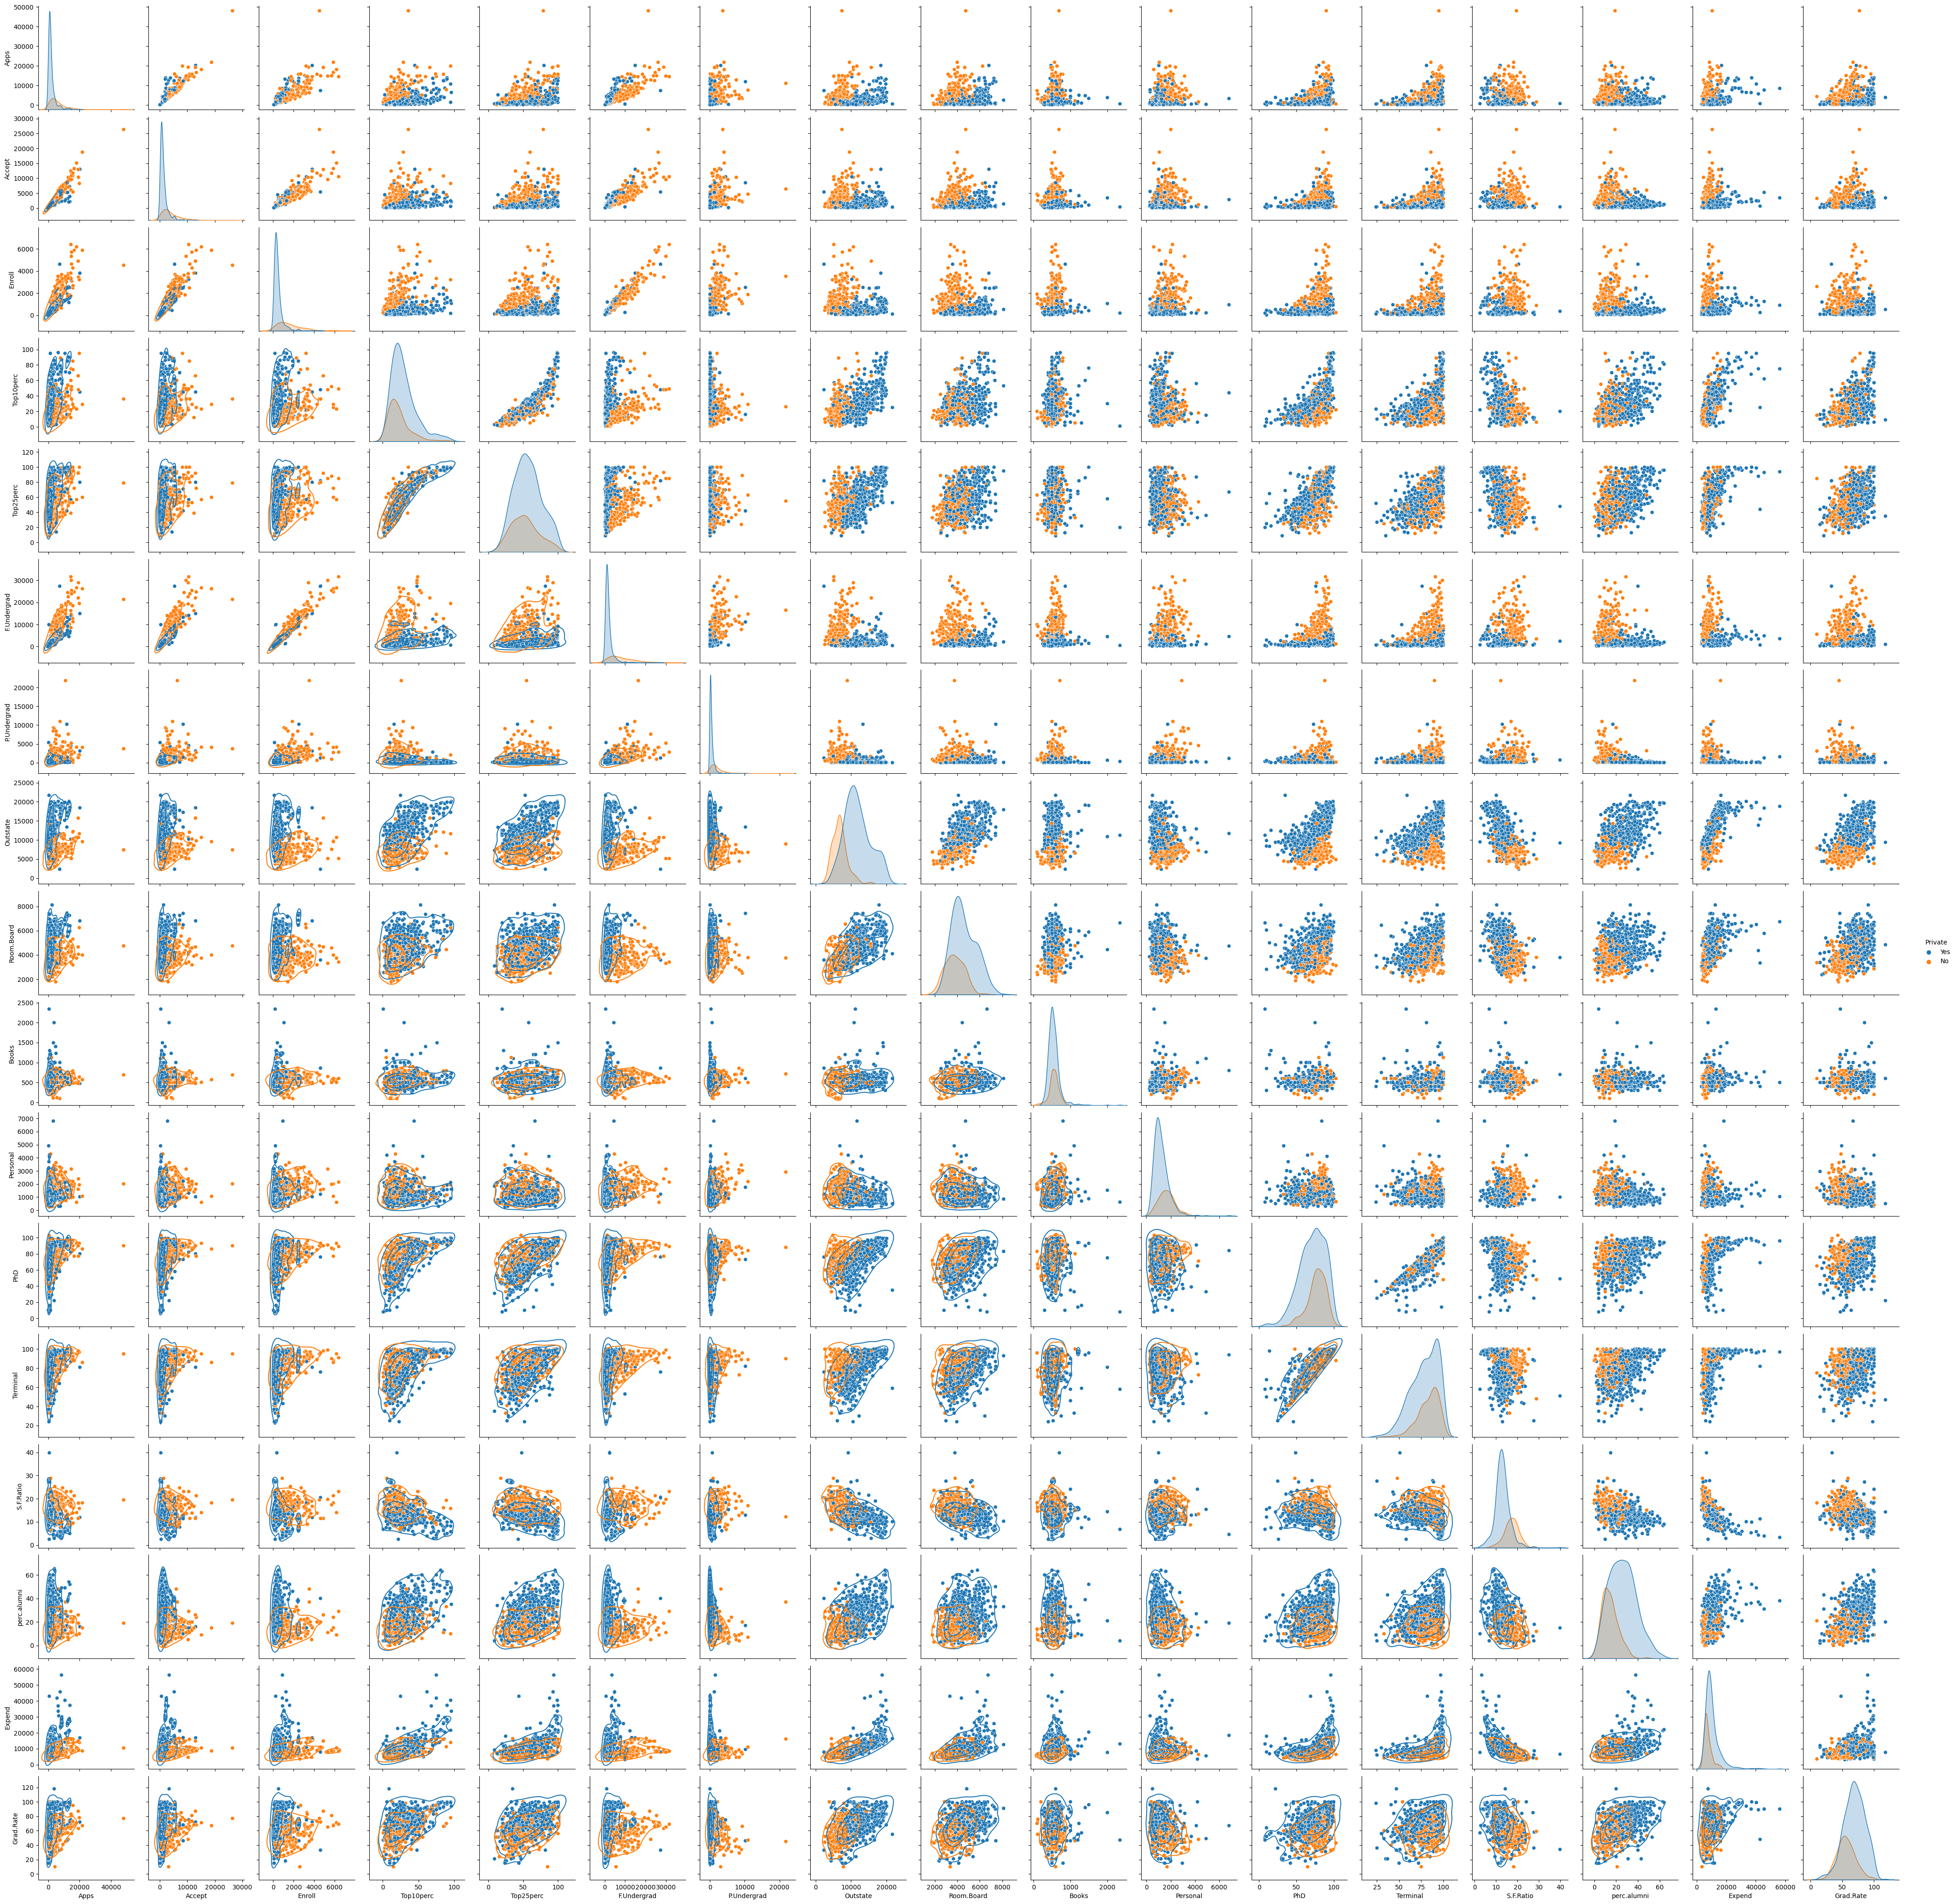

In [9]:
g = sns.pairplot(data1,hue="Private", diag_kind="kde")   #General plot of data according to study in private collage or not
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.savefig("sns-plot.png")

In [10]:
######### Show features that have some solitary data according to above chart ##########

In [11]:
data1[data1['Apps'] > 40000]                             # Show which college recieived the maximum Apps 

Private   Apps  Accept  Enroll  Top10perc  Top25perc  \
Rutgers at New Brunswick      No  48094   26330    4520         36         79   

                          F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Rutgers at New Brunswick        21401         3712      7410        4748   

                          Books  Personal  PhD  Terminal  S.F.Ratio  \
Rutgers at New Brunswick    690      2009   90        95       19.5   

                          perc.alumni  Expend  Grad.Rate  
Rutgers at New Brunswick           19   10474         77

In [12]:
data1[data1['Accept'] > 25000]                     # Show which college recieived the maximum Accept 

Private   Apps  Accept  Enroll  Top10perc  Top25perc  \
Rutgers at New Brunswick      No  48094   26330    4520         36         79   

                          F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Rutgers at New Brunswick        21401         3712      7410        4748   

                          Books  Personal  PhD  Terminal  S.F.Ratio  \
Rutgers at New Brunswick    690      2009   90        95       19.5   

                          perc.alumni  Expend  Grad.Rate  
Rutgers at New Brunswick           19   10474         77

In [13]:
data1[data1['P.Undergrad'] > 15000]                     # Show which college had the maximum number of part time students 

Private   Apps  Accept  Enroll  Top10perc  \
University of Minnesota Twin Cities      No  11054    6397    3524         26   

                                     Top25perc  F.Undergrad  P.Undergrad  \
University of Minnesota Twin Cities         55        16502        21836   

                                     Outstate  Room.Board  Books  Personal  \
University of Minnesota Twin Cities      8949        3744    714      2910   

                                     PhD  Terminal  S.F.Ratio  perc.alumni  \
University of Minnesota Twin Cities   88        90       12.2           37   

                                     Expend  Grad.Rate  
University of Minnesota Twin Cities   16122         45

In [14]:
data1[data1['Books'] > 1700]                     # Show which colleges bought the maximum number of Books 

Private  Apps  Accept  Enroll  Top10perc  \
Bradley University              Yes  3767    3414    1061         30   
Center for Creative Studies     Yes   601     396     203          1   

                             Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Bradley University                  58         4531          643     10870   
Center for Creative Studies         20          525          323     11230   

                             Room.Board  Books  Personal  PhD  Terminal  \
Bradley University                 4440   2000      1522   75        81   
Center for Creative Studies        6643   2340       620    8        58   

                             S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Bradley University                14.4           21    7671         85  
Center for Creative Studies        6.8            4   13025         47

In [15]:
data1[data1['Personal'] > 6000]                     # Show which colleges had the maximum personal spending 

Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
Saint Louis University     Yes  3294    2855     956         44         67   

                        F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
Saint Louis University         4576         1140     11690        4730    800   

                        Personal  PhD  Terminal  S.F.Ratio  perc.alumni  \
Saint Louis University      6800   84        94        4.6           19   

                        Expend  Grad.Rate  
Saint Louis University   18367         67

In [16]:
data1[data1['S.F.Ratio'] > 35]                     # Show which colleges had maximum S.F.Ratio 

Private  Apps  Accept  Enroll  Top10perc  \
Indiana Wesleyan University     Yes   735     423     366         20   

                             Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Indiana Wesleyan University         48         2448          707      9210   

                             Room.Board  Books  Personal  PhD  Terminal  \
Indiana Wesleyan University        3782    700      1000   49        51   

                             S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Indiana Wesleyan University       39.8           15    6562         34

In [17]:
data1[data1['Expend'] > 50000]                     # Show which colleges had the maximum nomber of Instructional expenditure 

Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
Johns Hopkins University     Yes  8474    3446     911         75         94   

                          F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Johns Hopkins University         3566         1569     18800        6740   

                          Books  Personal  PhD  Terminal  S.F.Ratio  \
Johns Hopkins University    500      1040   96        97        3.3   

                          perc.alumni  Expend  Grad.Rate  
Johns Hopkins University           38   56233         90

In [18]:
data1[data1['Grad.Rate'] > 100]                  # Show which featutre had Grad.Rate more than 100%

Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
Cazenovia College     Yes  3847    3433     527          9         35   

                   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
Cazenovia College         1010           12      9384        4840    600   

                   Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  \
Cazenovia College       500   22        47       14.3           20    7697   

                   Grad.Rate  
Cazenovia College        118

In [19]:
data1['Grad.Rate']['Cazenovia College'] = 100    #There is one data that has Grad.Rate above 100. Replace 118 with 100  

C:\Users\LapTopCity\AppData\Local\Temp\ipykernel_3560\1647959208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Grad.Rate']['Cazenovia College'] = 100    #There is one data that has Grad.Rate above 100. Replace 118 with 100


In [20]:
data1[data1['Grad.Rate'] > 100]            #check that it is replaced or not?

Empty DataFrame
Columns: [Private, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [21]:
data1.iloc[95]     # Making sure about replacing 118 with 100

Private         Yes
Apps           3847
Accept         3433
Enroll          527
Top10perc         9
Top25perc        35
F.Undergrad    1010
P.Undergrad      12
Outstate       9384
Room.Board     4840
Books           600
Personal        500
PhD              22
Terminal         47
S.F.Ratio      14.3
perc.alumni      20
Expend         7697
Grad.Rate       100
Name: Cazenovia College, dtype: object

In [22]:
data2=data1.drop('Private',axis=1)           #remove Private column because of its objective properties

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


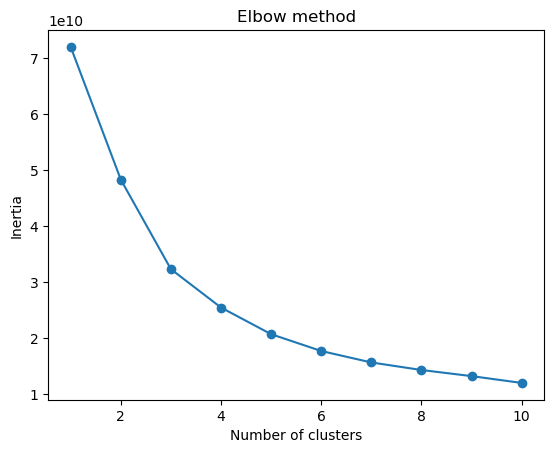

In [23]:
List = []                #Plot Elbow diagram to show the number of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    List.append(kmeans.inertia_)

plt.plot(range(1,11), List, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
!pip install --upgrade kneed

In [25]:
from kneed import KneeLocator             #import kneed library to investigate the number of elbows

In [26]:
k1 = KneeLocator (range (1,11) , List, curve = "convex", direction="decreasing")         #show the number of clusters    
k1.elbow

4

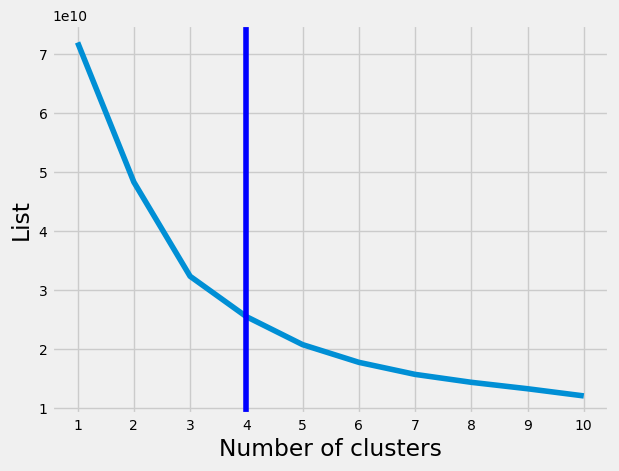

In [27]:
plt.style.use("fivethirtyeight")    #plot the diagram to show the optimum elbow
plt.plot(range(1,11),List)
plt.xticks(range (1,11))
plt.xlabel("Number of clusters")
plt.ylabel("List")
plt.axvline(x = k1.elbow, color = 'b', label = 'axvline - full height')
plt.show()

In [28]:
  #calculate centroids
kmeans = KMeans(n_clusters=4,random_state=0).fit(data2)             # identify centroids of each cluster in each column
centroids=kmeans.cluster_centers_
print (centroids)

[[1.07943457e+04 7.40849383e+03 2.97040741e+03 3.24320988e+01
  6.40864198e+01 1.55874074e+04 3.12161728e+03 8.33203704e+03
  4.17024691e+03 5.98530864e+02 1.87651852e+03 8.44691358e+01
  8.99382716e+01 1.63197531e+01 1.60246914e+01 9.55893827e+03
  6.09259259e+01]
 [1.66531263e+03 1.19970664e+03 5.01379015e+02 2.01755889e+01
  4.78351178e+01 2.33037259e+03 7.24963597e+02 8.41803640e+03
  3.95341542e+03 5.31398287e+02 1.36892934e+03 6.55417559e+01
  7.30620985e+01 1.50610278e+01 1.94839400e+01 7.28714989e+03
  6.05588865e+01]
 [2.31865385e+03 1.60218269e+03 4.97418269e+02 3.73653846e+01
  6.68125000e+01 1.98278365e+03 3.08692308e+02 1.50268606e+04
  5.16238942e+03 5.67418269e+02 1.07490385e+03 8.19711538e+01
  8.89230769e+01 1.17923077e+01 3.14471154e+01 1.27980144e+04
  7.57548077e+01]
 [9.42619048e+03 3.57171429e+03 1.32519048e+03 7.58095238e+01
  9.17619048e+01 5.31166667e+03 4.26190476e+02 1.81283333e+04
  6.09457143e+03 5.81047619e+02 1.27671429e+03 9.31904762e+01
  9.65714286e+01

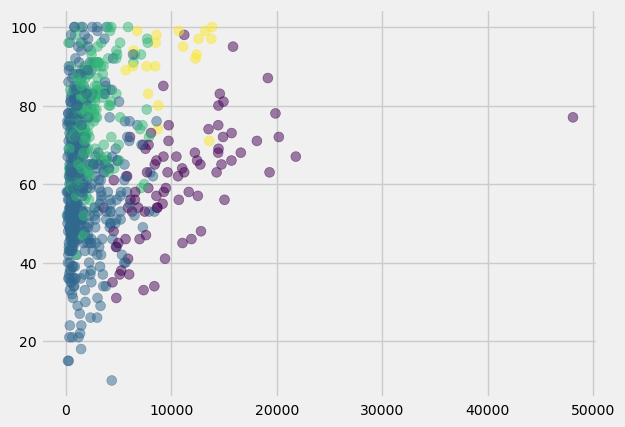

In [29]:
plt.scatter(data2['Apps'], data2['Grad.Rate'],c=kmeans.labels_.astype(float),s=50,alpha=0.5)
plt.show()

In [30]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}         #define dictionary
scaler=StandardScaler()
scaled_features=scaler.fit_transform(data2)

In [31]:
# calculate silhouette_coefficients
silhouette_coefficients = []
  
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score=silhouette_score(scaled_features,kmeans.labels_)
    silhouette_coefficients.append(score)

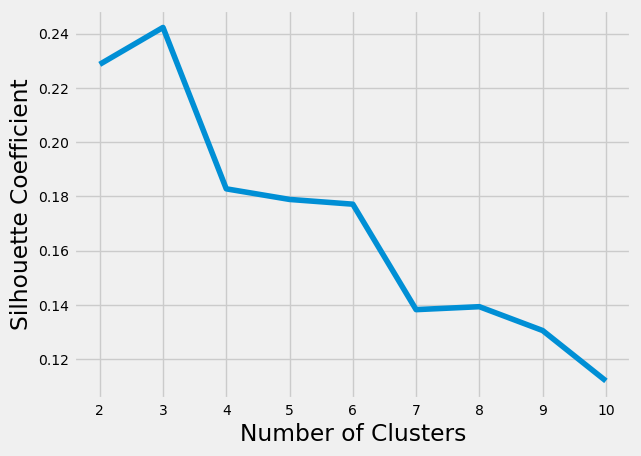

In [32]:
plt.style.use("fivethirtyeight")          #Plot Silhouette Coefficient to determine the evaluate the number of clusters. 
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [37]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(data2)
labels = kmeans_model.labels_
metrics.silhouette_score(data2, labels, metric='euclidean')

0.4759356971996221